<a href="https://colab.research.google.com/github/aj2622/Computational-CogSci/blob/master/Metropolis_Hastings_Speech_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing the Metropolis–Hastings algorithm for a Bayesian model of speech perception

In [0]:
# Import the necessary packages
import numpy as np
import random
from scipy.stats import norm
from scipy.special import logsumexp
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [0]:
# Key parameters we need for the probabilistic model
mu_c = 0 # category mean
sigma_c = 0.5 # category standard deviation
sigma2_c = sigma_c**2 # category variance
sigma_s = 0.4 # perceptual noise standard deviation
sigma2_s = sigma_s**2 # perceptual noise variance
X = np.linspace(-0.5,2,num=20) # points we are going to evaluate for warping

In [0]:
def logprior_normal(T):
    # Log-probability of speech production T
    return norm.logpdf(T,mu_c,sigma_c)

In [0]:
def loglikelihood_normal(S,T):
    # Log-probability of a stimulus S given production T
    return norm.logpdf(S,T,sigma_s)

In [0]:
def post_mean_normal_normal(S):
    # Posterior mean E[T|S] of sound production T given signal S, given normal P(T) and P(S|T)
    return (sigma2_c*S+sigma2_s*mu_c)/(sigma2_c+sigma2_s)

Normal-normal model with exact inference


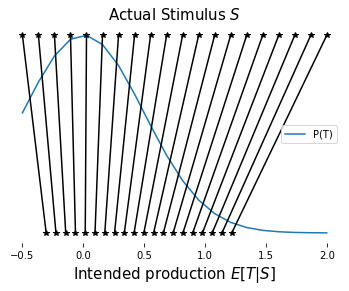

In [8]:
def plot_warp(f_posterior_mean,stimuli_eval,f_logprior,verbose=False):
    # Input
    #   f_posterior_mean : function handle f(S) that estimates posterior mean E[T|S] for a raw stimulus S
    #      (only works for scalar S)
    #   stimuli_eval : [numpy array] of raw stimuli S we want to evalute
    #   f_logprior : function handle f(T) that evaluates log-prior log P(T) for production T
    plt.figure()
    mypdf = np.exp(f_logprior(stimuli_eval))
    mx = np.max(mypdf)
    plt.plot(stimuli_eval,mypdf)
    for idx,x in enumerate(stimuli_eval):
        if verbose:
            print('  Estimating ' + str(idx+1) + ' of ' + str(len(stimuli_eval)) + ' stimuli S')
        x_new = f_posterior_mean(x)
        plt.plot([x,x_new],[mx,0.],'k*-')
    plt.legend(['P(T)'])
    plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=False, labelbottom=True)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.title('Actual Stimulus $S$',size=15)
    plt.xlabel('Intended production $E[T|S]$',size=15)

print('Normal-normal model with exact inference')
plot_warp(post_mean_normal_normal,X,logprior_normal)

Normal-normal model with MCMC inference


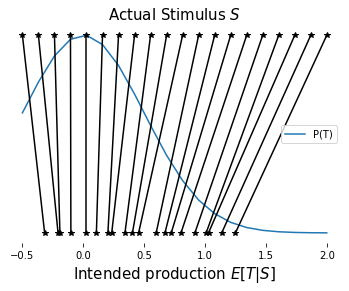

In [9]:
def estimate_metropolis_hastings(S,f_loglikelihood,f_logprior,nsamp=2000,nburn_in=100,prop_width=0.25):
    #
    #  Draw a sequence of samples T_(nburn_in), T_2, ..., T_nsamp from the posterior distribution P(T|S)
    #
    # Input
    #  S : actual stimulus (scalar value only)
    #  f_loglikelihood : function handle f(S,T) to log-likelihood log P(S|T)
    #  f_logprior : function handle f(t) to log-prior P(T)
    #  nsamp : how many samples to produce in MCMC chain
    #  nburn_in : how many samples at the beginning of the chain should we toss away
    #  prop_width : standard deviation of Gaussian proposal, centered at current value of T
    #
    assert(isinstance(S, float))
    samples = np.array([])
    # TODO: Your code goes here
    estimate = S
    for t in range(1, nsamp):
        sample = np.random.normal(estimate,prop_width)
        a = f_loglikelihood(S,sample) + f_logprior(sample) - f_loglikelihood(S,estimate) - f_logprior(estimate)
        if a >= 1:
            estimate = sample
        else:
            if random.random() < a:
                estimate = sample 
            else:
                estimate = estimate
        samples = np.append(samples, estimate)
    return np.mean(samples[nburn_in:])

print('Normal-normal model with MCMC inference')
f_posterior_mean = lambda S : estimate_metropolis_hastings(S,loglikelihood_normal,logprior_normal,nsamp=2000)
plot_warp(f_posterior_mean,X,logprior_normal,verbose=False)

Normal-normal model with MCMC inference


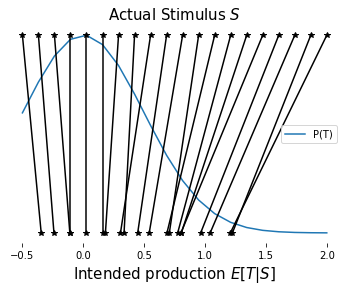

In [10]:
print('Normal-normal model with MCMC inference')
f_posterior_mean = lambda S : estimate_metropolis_hastings(S,loglikelihood_normal,logprior_normal,nsamp=102)
plot_warp(f_posterior_mean,X,logprior_normal,verbose=False)

Normal-normal model with MCMC inference


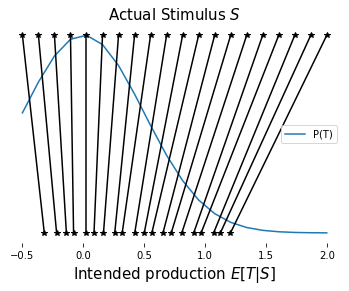

In [11]:
print('Normal-normal model with MCMC inference')
f_posterior_mean = lambda S : estimate_metropolis_hastings(S,loglikelihood_normal,logprior_normal,nsamp=20000)
plot_warp(f_posterior_mean,X,logprior_normal,verbose=False)

Laplace-normal model with MCMC inference


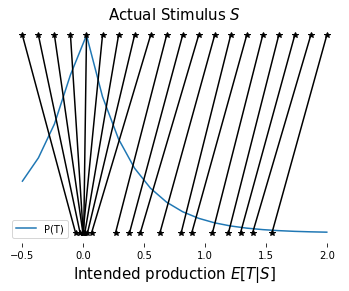

In [12]:
def logprior_laplace(T):
    # Alternative prior distribution
    #  log P(T|c) ~ Laplace(mu_c,b)
    b = sigma_c/np.sqrt(2)
    return (-np.abs(T-mu_c)/b) - np.log(2*b)

print('Laplace-normal model with MCMC inference')
f_posterior_mean = lambda S : estimate_metropolis_hastings(S,loglikelihood_normal,logprior_laplace)
plot_warp(f_posterior_mean,X,logprior_laplace,verbose=False)